# 마케팅 캠페인 반응고객 예측(marketing analysis)

## 문제상황  

A마트는 온/오프라인으로 다양한 채널에서 고객 마케팅을 수행하고 있다. 두 채널에 대한 Mass 마케팅을 운영하다 보니 마케팅 비용이 과다하게  
발생하고 있다. 마케팅 비용 절감을 위해 마케팅 반응 가능성이 높은 고객 대상으로 타겟 마케팅을 수행하고자 한다.

## 문제 해결 프로세스  

1. 문제정의

- 온/오프라인 대상 Mass 마케팅으로 인한 마케팅 비용 과다 발생

2. 기대효과

- 타겟 마케팅으로 마케팅 비용 절감  

3. 해결방안

- 마케팅 반응 가능성 모델링을 통해 타겟 마케팅 수행 

4. 성과측정

- 타겟마케팅 전/후 마케팅 비용 대비 반응률

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('C:/Users/USER/Desktop/Practice Project/마케팅 캠페인 반응고객 예측/마케팅 캠페인 반응고객 예측.csv', sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
print("총 결측치 수: {} = 전체 데이터의 {:.2f}%".format(df.isnull().sum().sum(), (df.isnull().sum().sum()*100)/(df.shape[0]*df.shape[1])))

총 결측치 수: 24 = 전체 데이터의 0.04%


#### 변수 해석 3가지  

1. 결측치 존재 여부

- 전체 데이터에서 Income 변수에만 결측치가 존재한다.

- 결측치의 개수는 전체 1% 채 되지 않는 24개이다.

- 결측치를 대체하는 경우, object형태는 최빈값으로 대체하고, int64, float64형태는 평균으로 대체하거나 KNN을 사용할 수 있다.

- 결측치의 개수가 전체 데이터에 비해 적기 때문에 제거해도 상관없지만 전체 데이터의 개수가 너무 적어서 모든 데이터를 사용하는 것이 좋아보인다.

2. 데이터 타입 설명

- 종속변수는 int64형태, 독립변수는 object, int64, float64형태로 구성되어 있다. 독립변수 object타입은 인코딩을 통하여 변환해줄 필요가 있어보인다. 

- 종속변수 형태는 int64이나 여부를 나타내는 변수이기에 의미상 object이다.

3. 컬럼 설명

- ID : 고객 ID
- Year_Birth : 출생년도
- Education : 교육수준
- Marital_Status : 결혼여부
- Income : 수입
- Kidhome : 어린이명
- Teenhome : 청소년명
- Dt_Customer : 고객등록일
- Recency : 마지막구입일로부터 경과일
- MntWines : 최근2년 와인구매량
- MntFruits : 최근2년 과일구매량
- MntMeatProducts : 최근2년 고기구매량
- MntFishProducts : 최근2년 생선구매량
- MntSweetProducts : 최근2년 제과구매량
- MntGoldProds : 최근2년 보석구매량
- NumDealsPurchases : 할인 구매횟수
- NumWebPurchases : 온라인 구매횟수
- NumCatalogPurchases : 카탈로그이용 구매횟수
- NumStorePurchases : 오프라인 구매횟수
- NumWebVisitsMonth : 월 웹사이트 방문횟수
- AcceptedCmp3 : 3번째 캠페인 반응여부
- AcceptedCmp4 : 4번째 캠페인 반응여부
- AcceptedCmp5 : 5번째 캠페인 반응여부
- AcceptedCmp1 : 1번째 캠페인 반응여부
- AcceptedCmp2 : 2째 캠페인 반응여부
- Complain : 컴플레인 여부
- Z_CostContact : 고객연락비용
- Z_Revenue : 마케팅수익
- Response : 최종 마케팅 반응여부

In [6]:
df['Income'].fillna(df['Income'].mean(), inplace=True)

결측치를 평균 값으로 대체한다. 소득 데이터이기 때문에 0으로 처리시 문제가 된다. 소득이 없으면 물건을 구매할 수 없기 때문이다

In [7]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
pd.set_option('display.max_rows', 500)

pd.set_option('display.max_columns', 500)

df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


우선 describe로 이상치를 판단하기 위해서는 mean, min, max 값을 확인하는 것이 좋다. mean과 min, mean과 max 값이 std에 비해 한참 차이가 난다면, 이상치가 있을 가능성이 높다. 위의 데이터처럼 컬럼수가 많을 경우, set_option을 통해서 모든 컬럼을 보이게 설정하면 모든 컬럼이 보여진다.  

이러한 이상치를 정확히 판단하기 위해서는 아래와 같이 boxplot으로 시각화하여 보는 것이 정확하다.

In [9]:
df_n = df.select_dtypes(exclude = 'object')

In [10]:
outlier = pd.melt(df_n, var_name = '이상치 탐색 변수', value_name = '이상치 탐색 값')
outlier

,이상치 탐색 변수,이상치 탐색 값
0,ID,5524.0
1,ID,2174.0
2,ID,4141.0
3,ID,6182.0
4,ID,5324.0
...,...,...
58235,Response,0.0
58236,Response,0.0
58237,Response,0.0
58238,Response,0.0


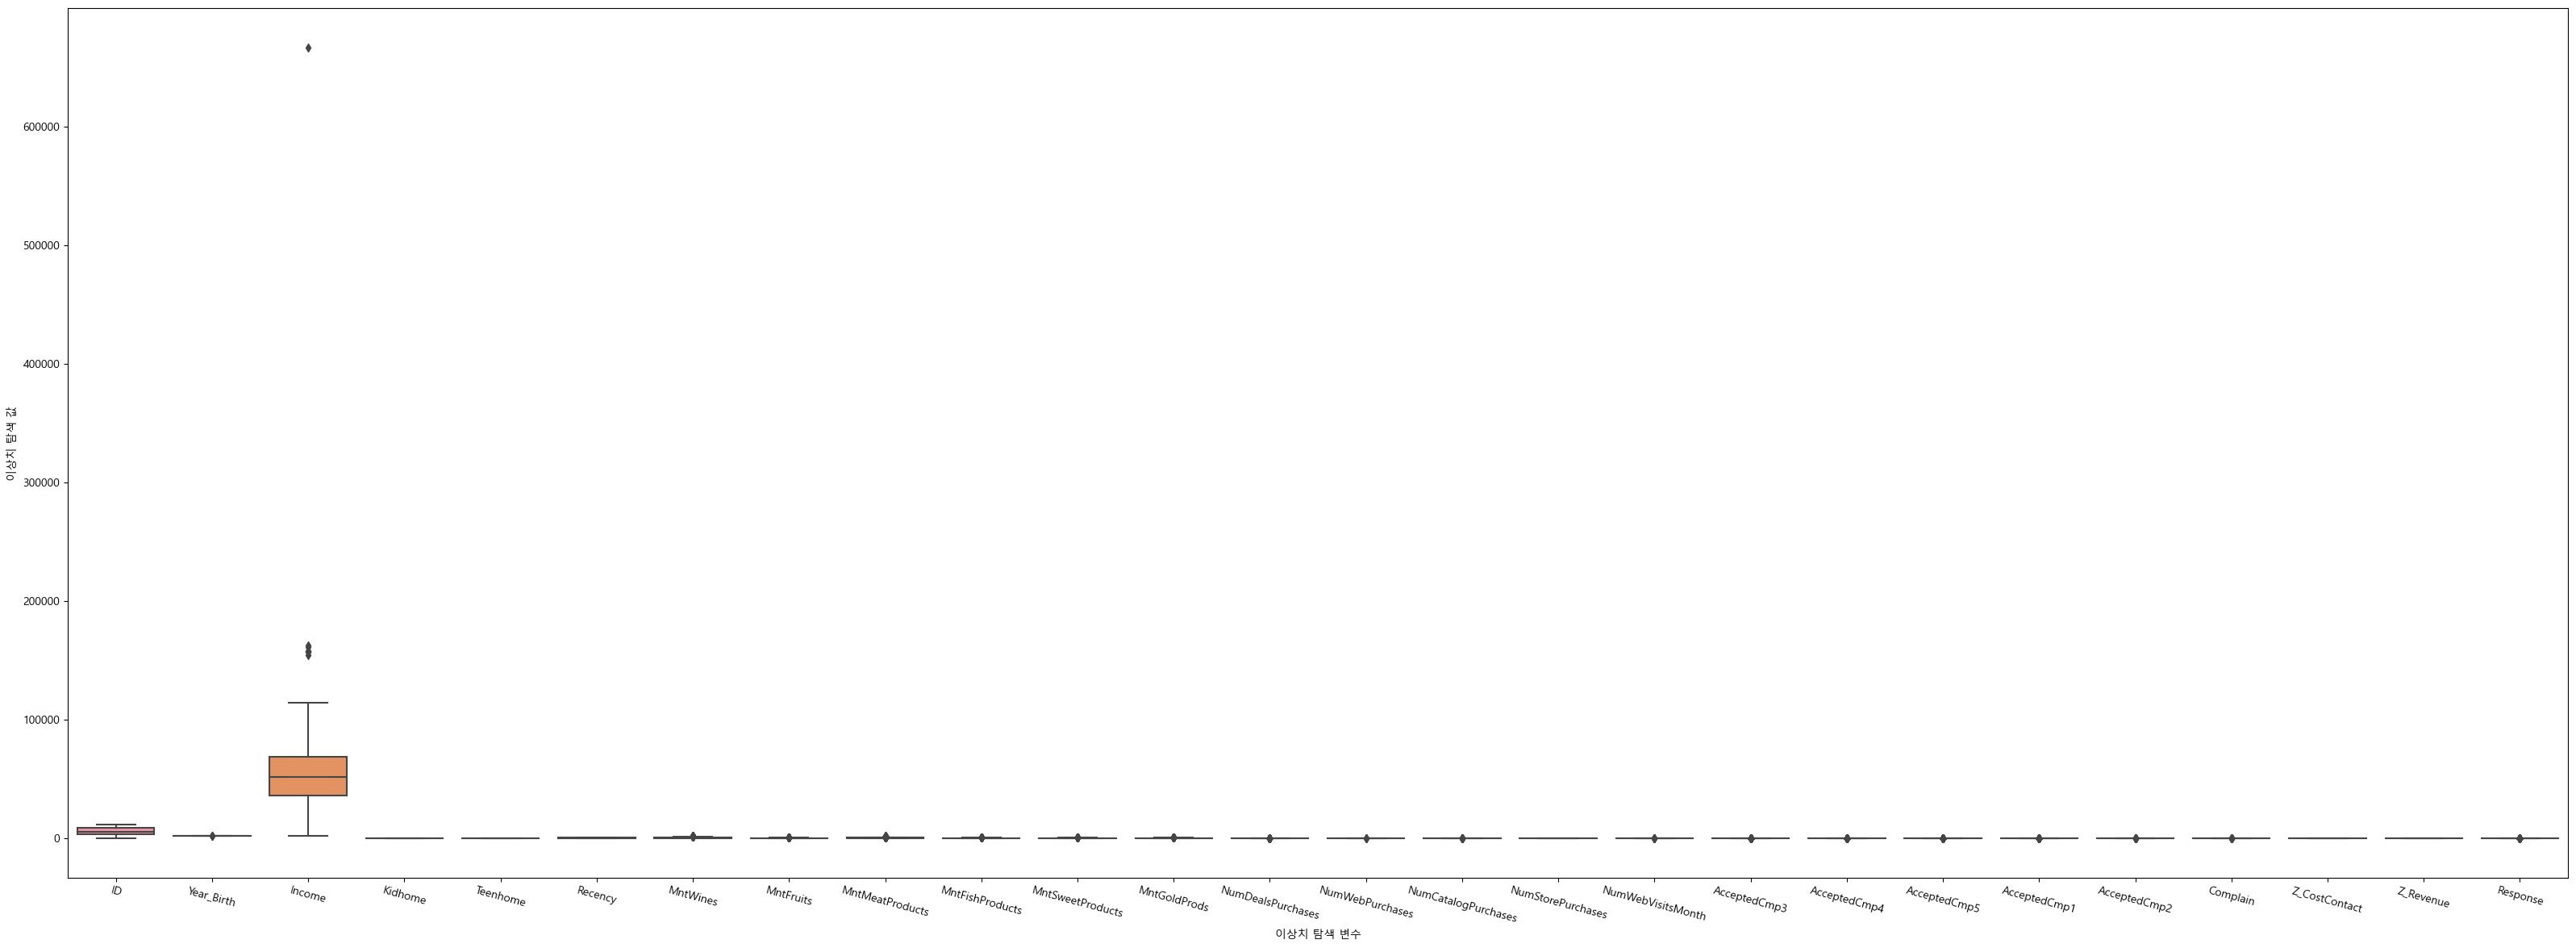

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc("font", family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (40,14))
sns.boxplot(x = '이상치 탐색 변수', y = '이상치 탐색 값', data = outlier)
plt.xticks(range(26), df_n.columns)
plt.xticks(rotation=-15)
plt.show()

In [12]:
df['Income'].max()

666666.0

이상치를 탐색하기 위해서 수치형 변수들만 선택해서 boxplot으로 시각화하였다. 이상치의 값이 연속적으로 나타나면, 보통 의미있는 값일 확률이 높기 때문에 따로 제거하거나 대체하지 않고, 눈에 띄는 이상치가 있을 경우에는 보통 제거하거나 대체하는 경우가 많다.Income 변수는 수입이기 때문에 매우 극단적인 값이 아닌 이상 그대로 두는 것이 좋아보인다(예를 들어, Age 변수가 999값이 있으면 제거하거나 대체하는 것이 옳다.)

In [13]:
import datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'].min(), df['Dt_Customer'].max()

(Timestamp('2012-07-30 00:00:00'), Timestamp('2014-06-29 00:00:00'))

Dt_Customer 변수는 단순한 날짜로는 사용할 수 없는 컬럼이다. datetime 변수는 연도별,월별,몇 일 경과 등으로 구분지어서 분석한다. 

이번 분석에서 몇 일이 경과되었는지에 대한 연속형 변수로 변환하여 사용한다

In [14]:
df['Dt_Customer'] = df['Dt_Customer'].apply(lambda x : (df['Dt_Customer'].max() - x).days)
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,663,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,113,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,312,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,139,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,161,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


"df['Dt_Customer'].max() - x"  

고객등록일 마지막날 - 고객등록일 => 고객 등록후 경과일 

### 캠페인 반응률 분석

In [15]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [16]:
print("평균 캠페인 반응률 : ", (334 / (334 + 1906))*100)

평균 캠페인 반응률 :  14.910714285714285


In [17]:
df_mkt = df[['AcceptedCmp5', 'AcceptedCmp4', 'AcceptedCmp3', 'AcceptedCmp2', 'AcceptedCmp1', 'Response']]
df_mkt.head(5)

,AcceptedCmp5,AcceptedCmp4,AcceptedCmp3,AcceptedCmp2,AcceptedCmp1,Response
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


과거 캠페인 반응 여부와 캠페인 반응률 분석을 실시한다

In [18]:
df_mkt['cmp_sum'] = df_mkt['AcceptedCmp5'] + df_mkt['AcceptedCmp4'] + df_mkt['AcceptedCmp3'] + df_mkt['AcceptedCmp2'] + df_mkt['AcceptedCmp1']
df_mkt.head(10)

,AcceptedCmp5,AcceptedCmp4,AcceptedCmp3,AcceptedCmp2,AcceptedCmp1,Response,cmp_sum
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0
9,0,0,1,0,0,0,1


과거 캠페인 반응 여부에 대해 모두 더한 것을 새로운 컬럼으로 생성한다

In [19]:
df_mkt_gp = df_mkt.groupby('cmp_sum')['Response'].agg(['count','sum'])
df_mkt_gp['ratio'] = round((df_mkt_gp['sum'] / df_mkt_gp['count']) * 100, 1)
df_mkt_gp

,count,sum,ratio
cmp_sum,,,
0,1777,146,8.2
1,325,101,31.1
2,83,42,50.6
3,44,35,79.5
4,11,10,90.9


과거에 캠페인 반응을 많이 했던 고객일수록 다음 캠페인 반응률이 높을것으로 기대된다

## 마케팅 반응 여부에 따른 고객 특성(수치형 변수)

In [21]:
numeric_list=[]
categoical_list=[]

for i in df.columns :
    if df[i].dtypes == 'O' :
        categoical_list.append(i)
    else :
        numeric_list.append(i)

print("categoical_list :", categoical_list)
print("")
print("numeric_list :", numeric_list)

categoical_list : ['Education', 'Marital_Status']

numeric_list : ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


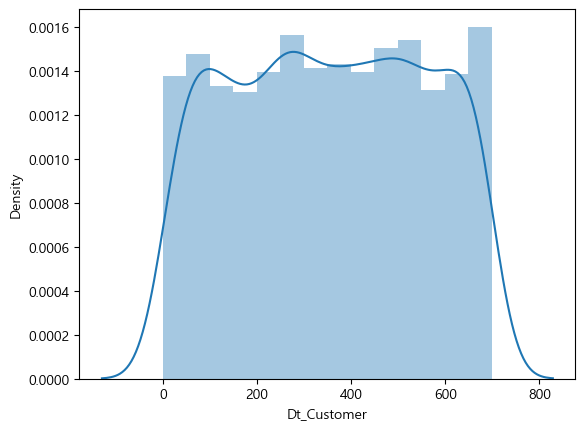

In [22]:
sns.distplot(df['Dt_Customer']);

고객등록일(Dt_Customer)의 분포를 확인한다. 대부분의 데이터가 고르게 분포되어 있다

In [23]:
import numpy as np
df['Dt_Customer_gp'] = np.where (df['Dt_Customer'] <= 200, 1, 
                           np.where(df['Dt_Customer'] <= 500, 2, 3))

df[['Dt_Customer','Dt_Customer_gp']]

,Dt_Customer,Dt_Customer_gp
0,663,3
1,113,1
2,312,2
3,139,1
4,161,1
...,...,...
2235,381,2
2236,19,1
2237,155,1
2238,156,1


200, 500 사이의 값을 평균으로 측정하고 3개의 구간으로 구간화를 진행한다

In [24]:
df_gp = df.groupby('Dt_Customer_gp')['Response'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
Dt_Customer_gp,,,
1,618,52,8.4
2,980,121,12.3
3,642,161,25.1


고객 등록후 경과일이 오래될수록 캠페인 반응률이 높게 나온다

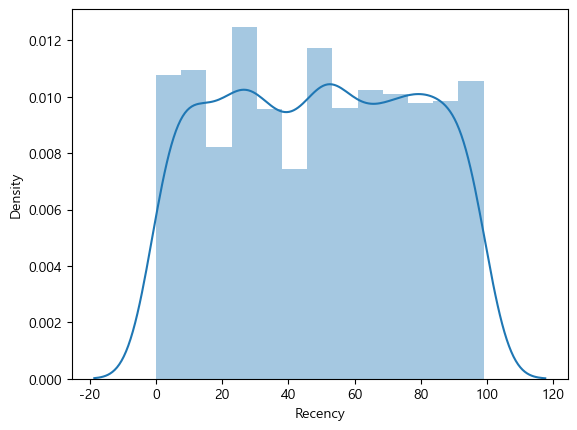

In [25]:
sns.distplot(df['Recency']);

마지막구입일로부터 경과일(Recency)의 분포를 확인한다. 대부분의 데이터가 고르게 분포되어 있다

In [30]:
import numpy as np
df['Recency_gp'] = np.where (df['Recency'] <= 35, 1, 
                           np.where(df['Recency'] <= 65, 2, 3))

df[['Recency','Recency_gp']]

,Recency,Recency_gp
0,58,2
1,38,2
2,26,1
3,26,1
4,94,3
...,...,...
2235,46,2
2236,56,2
2237,91,3
2238,8,1


35, 65 사이의 값을 평균으로 측정하고 3개의 구간으로 구간화를 진행한다

In [31]:
df_gp = df.groupby('Recency_gp')['Response'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
Recency_gp,,,
1,820,190,23.2
2,674,84,12.5
3,746,60,8.0


마지막구입일로부터 경과일이 적어야 캠페인 반응률이 높게 나온다

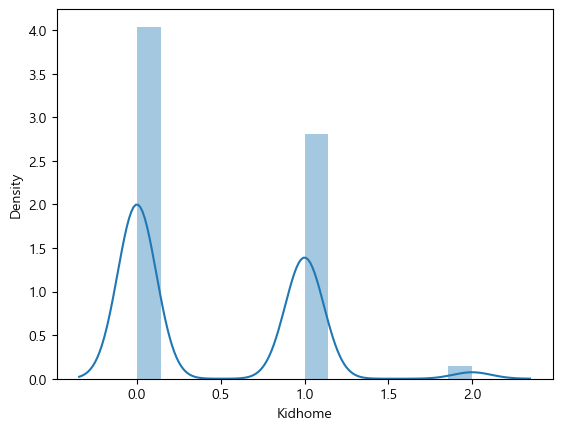

In [29]:
sns.distplot(df['Kidhome']);

Kidhome(가정 내 어린이 수)의 분포를 확인한다

In [32]:
import numpy as np
df['Kidhome_gp'] = np.where (df['Kidhome'] <= 0.5, 1, 2)

df[['Kidhome','Kidhome_gp']]

,Kidhome,Kidhome_gp
0,0,1
1,1,2
2,0,1
3,1,2
4,1,2
...,...,...
2235,0,1
2236,2,2
2237,0,1
2238,0,1


0.5를 기준으로 측정하고 2개의 구간으로 구간화를 진행한다

In [34]:
df_gp = df.groupby('Kidhome_gp')['Response'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
Kidhome_gp,,,
1,1293,222,17.2
2,947,112,11.8


가정 내 어린이 수가 적을수록 캠페인 반응률이 높게 나온다

## 마케팅 반응 여부에 따른 고객 특성(범주형 변수)

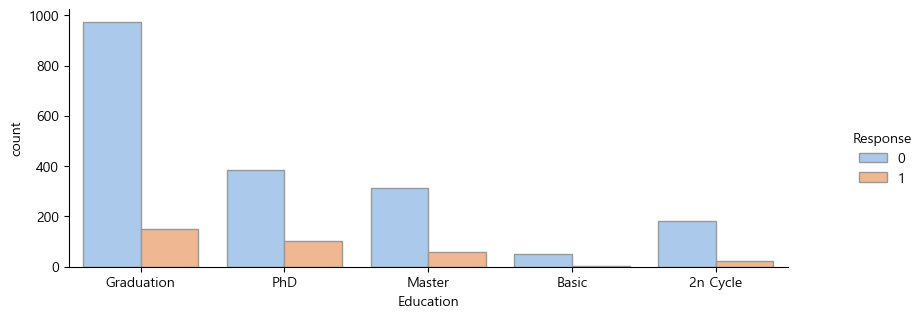

In [36]:
sns.catplot(x="Education", hue="Response", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)

교육수준에 따른 캠페인 반응률 분석을 실시한다

In [37]:
df_gp = df.groupby('Education')['Response'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp.sort_values(by=['ratio'],ascending = False)

,count,sum,ratio
Education,,,
PhD,486,101,20.8
Master,370,57,15.4
Graduation,1127,152,13.5
2n Cycle,203,22,10.8
Basic,54,2,3.7


교육수준이 박사학위이면 가장 캠페인 반응률이 높다

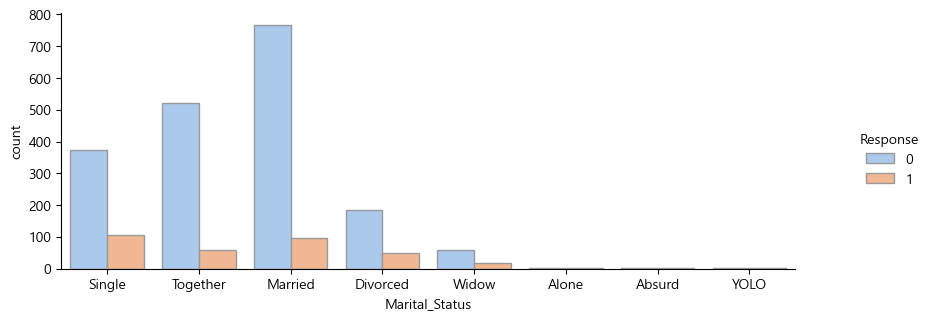

In [38]:
sns.catplot(x="Marital_Status", hue="Response", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)

결혼 여부에 따른 캠페인 반응률 분석을 실시한다

In [39]:
df_gp = df.groupby('Marital_Status')['Response'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp.sort_values(by=['ratio'],ascending = False)

,count,sum,ratio
Marital_Status,,,
Absurd,2,1,50.0
YOLO,2,1,50.0
Alone,3,1,33.3
Widow,77,19,24.7
Single,480,106,22.1
Divorced,232,48,20.7
Married,864,98,11.3
Together,580,60,10.3


위의 표를 보면, Absurd/YOLO/Alone 변수가 반응률이 굉장히 높게 나왔다. 하지만, 여기서 주의할 점은 반응률이 높다고 해서 무조건 좋은 것은 아니다. 실제로 반응을 한 고객의 수는 1명밖에 되지 않는 매우 적은 모수이기 때문이다. 따라서, Widow(과부), Single(독신) 변수가 상위 변수라고 할 수 있다

## ML 활용 마케팅 반응고객 예측

In [40]:
df['mnt_sum'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_gp,Recency_gp,Kidhome_gp,mnt_sum
0,5524,1957,Graduation,Single,58138.0,0,0,663,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,3,2,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,113,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,1,2,2,27
2,4141,1965,Graduation,Together,71613.0,0,0,312,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2,1,1,776


최근 2년간의 모든 구매품목을 더한 새로운 변수를 생성한다

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['ID', 'Response', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer_gp', 'Recency_gp'], axis=1)
Y=df['Response']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1568, 27)
(1568,)
(672, 27)
(672,)


- 데이터 분리할 때, 분류분석은 stratify를 통해 층화추출하고 회귀분석은 동일한 비율로 나눌수가 없기 때문에 stratify 옵션을 사용하지 않는다

- 보통 데이터 행의 개수와 비슷한 차원이 있는 컬럼은 제거하고 모델링 하는 것이 좋다. 예를 들어, id 같은 것들. 각각의 값이 전부 유니크하면 제거한다

- 1개 컬럼에 모든 값이 동일하면 데이터 분리할 때 제거하는 것이 좋다

- 새로 만든 파생변수나 기존 컬럼과 동일한 의미의 컬럼들도 제거한다(단, 유의미한 변수라고 생각하면 그대로 둔다. ex) mnt_sum(최근 2년간의 모든 구매품목을 더한 새로운 변수))

- 범주형 변수의 값이 3-4개가 적당하고 20개가 넘는 변수는 보통 삭제하고 모델링하는게 좋은데, 처음에는 어떤 변수가 중요한지 모르니 일단 전부 투입시키고 하는게 좋다. 이러한 경우, 범주형 변수들을 인코딩 하면 차원이 워낙 많다보니까 오류 방지 차원에서 train과 test의 값을 합쳐서 만들고 fit 시켜줘야한다

- 분석 시간이 많다 = 범주형 변수들을 하나하나 제거해보면서 모델링

- 분석 시간이 없다 = 효율성을 위해 train과 test의 값을 한번에 fit해서 모델링

In [42]:
print(categoical_list)

['Education', 'Marital_Status']


In [43]:
from sklearn.preprocessing import LabelEncoder

for col in categoical_list:
    print(col)
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

Education
Marital_Status


범주형 변수는 One-hot-encoding 또는 Label-encoding을 통해 숫자형 변수로 변경해야한다. One-hot-encoding은 차원이 많은 변수에는 적절하지 않고, Label-encoding은 차원이 많은 변수에 유용하기 때문에 Label-encoding을 진행한다

In [44]:
x_test[categoical_list].head(5)

,Education,Marital_Status
467,2,6
1512,2,3
1198,4,3
825,0,2
1037,3,4


In [46]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 5.4 MB/s eta 0:00:00


In [47]:
import lightgbm as lgb

d_train = lgb.Dataset (x_train, label = y_train)

params = {} 
params [ 'learning_rate'] = 0.1
params [ 'boosting_type'] = 'gbdt' 
params ['objective'] = 'binary'
params [ 'metric' ] = 'binary_logloss' 
params [ 'max_depth'] = 2
params [ 'num_leaves' ] = 4
params ['seed'] = 23456

clf = lgb.train (params, d_train, 500) 

[LightGBM] [Info] Number of positive: 234, number of negative: 1334
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2012
[LightGBM] [Info] Number of data points in the train set: 1568, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.149235 -> initscore=-1.740616
[LightGBM] [Info] Start training from score -1.740616
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

light gbm은 따로 데이터셋을 만들어 줘야한다

In [48]:
from sklearn.metrics import classification_report

y_pred_train = clf.predict(x_train)
for i in range(0,len(y_pred_train)):
    if y_pred_train[i]>=.5:     
        y_pred_train[i]=1
    else:  
        y_pred_train[i]=0

y_pred_test = clf.predict(x_test)
for i in range(0,len(y_pred_test)):
    if y_pred_test[i]>=.5:      
        y_pred_test[i]=1
    else:  
        y_pred_test[i]=0



print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1334
           1       0.97      0.85      0.91       234

    accuracy                           0.97      1568
   macro avg       0.97      0.92      0.95      1568
weighted avg       0.97      0.97      0.97      1568

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       572
           1       0.66      0.45      0.54       100

    accuracy                           0.88       672
   macro avg       0.79      0.70      0.73       672
weighted avg       0.87      0.88      0.87       672



light gbm에서 classification report를 사용하려면 확률로 계산된 값을 0과 1로 변환해줘야한다. RandomForest는 바로 0,1로 값이 나오지만 light gbm은 확률로 값이 나오니 0,1로 변환이 필요하다

1. precision  

- 캠페인 반응을 할 것 같은 고객들을 예측한 고객들 중에서 실제로 캠페인 반응을 한 고객의 확률

- 장점 : 최대한 많은 캠페인 반응 고객들을 후보리스트로 만들어서 관리가 가능하며, 타겟 마케팅이 가능하다.

- 단점 : 실제로 그렇지 않은 고객들이 포함될 수 있다.


2. recall  

- 실제로 캠페인 반응을 한 고객들중에서 캠페인 반응 예측을 맞춘 확률

- 장점 : 실제로 캠페인 반응을 할것같은 고객들만 관리할 수 있다.

- 단점 : 캠페인 반응 고객들이 적어서 모수가 작아지기 때문에 마케팅 효과가 나타나지 않을 수 있다.

3. support

- 100명 중에 45명을 맞춰서 recall 값이 0.45값이 나왔다

- y_pred_test 1의 값인 68명중에 45명이 존재한다는 의미이다

In [49]:
pd.Series(y_pred_test).value_counts()

0.0    604
1.0     68
dtype: int64

In [50]:
from sklearn.metrics import roc_auc_score

y_pred_train_proba = clf.predict(x_train)
y_pred_test_proba = clf.predict(x_test)


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.9974900370327656
roc_score_test : 0.8909353146853146


4. roc_auc_score

- 이진 분류기의 성능을 평가할때 사용하는 지표로 100에 가까울 수록 모델 성능이 좋은 것이라고 할 수 있다.

- 다양한 threshold에 대한 이진분류기의 성능을 한번에 표시한 것이다.

- 여기서도 train과 test의 roc_score값이 차이가 약간 있으나 거의 과적합이 발생하지 않았다고 할 수 있다.

- 90에 가까운 값이 나온 것은 매우 좋은 모델이라고 할 수 있다.

5. predict

- 0과 1로 나누는 것(0.5 이하는 0, 초과는 1)

6. predict_proba

- 0일 확률과 1일 확률로 나누는 것

- RandomForest : [:, 1]의 의미는 전체 고객을 불러오기 위해 행을 :, 캠페인 반응 고객들의 확률만 추출하기 위해 2번째에 있는 열인 1을 불러온다는 의미이다. RandomForest는  predict_proba 같은 경우, 확률값으로 변환해야하기 때문에 [:,1]을 사용해야한다

- RandomForest : 1번째에 있는 열은 사기 거래를 하지 않은 고객들의 확률이다.

- light gbm : predict_proba 같은 경우, 바로 predict로 값을 대입하면 된다. 이미 확률값으로 산출된 알고리즘이기 때문이다.

In [52]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    plt.plot(fprs , tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')
  
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

roc_curve_plot에서 임곗값에 따른 FPR, TPR 값을 반환 받는다  

- FPR : 실제로는 음성인 데이터 중에서 분류기가 음성이 아니라 양성이라고 판별한 데이터의 비율(1 - 민감도)

- TPR : recall

- roc curve를 plot 곡선으로 그린다

- 가운데 대각선 직선을 그린다(기준선)

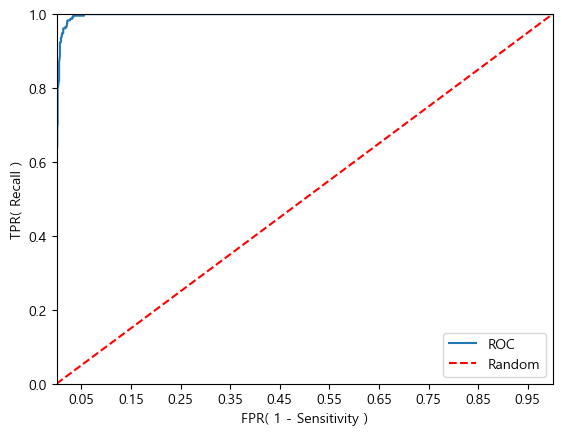

In [53]:
roc_curve_plot(y_train, y_pred_train_proba)

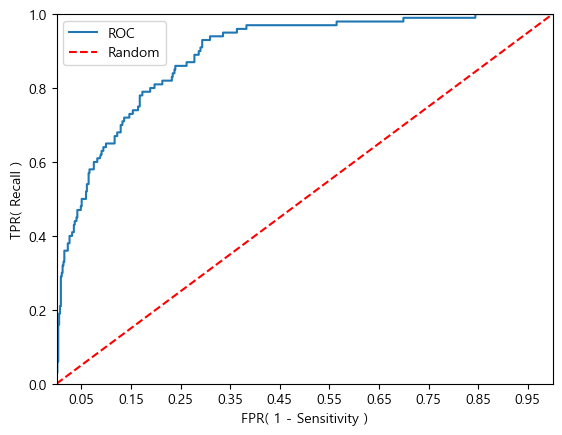

In [54]:
roc_curve_plot(y_test, y_pred_test_proba)

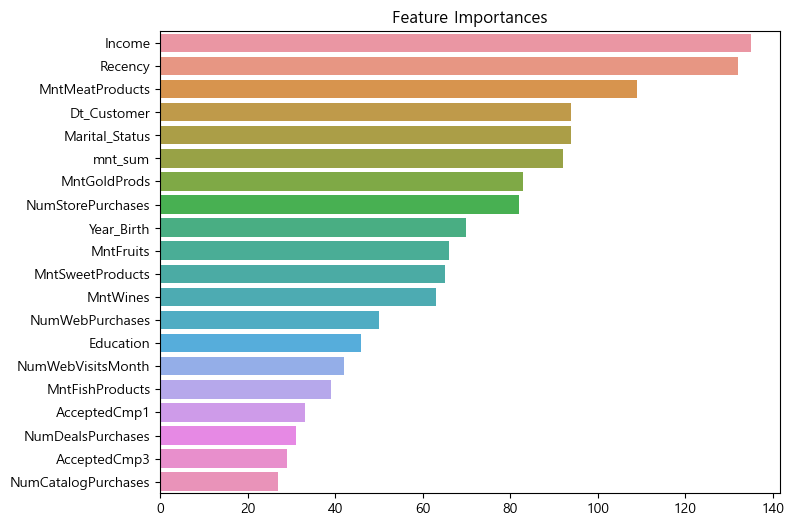

In [55]:
ftr_importances_values = clf.feature_importance() 
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

RandomForest = feature_importance_

light gbm = feature_importance()

Feature IMP 분석을 통해 중요변수를 파악한다. 위의 상위 변수들을 살펴보면, Income(수입)이 마케팅 캠페인 반응 고객을 예측하는데 가장 중요한 변수들임을 확인할 수 있다. 따라서 Income(수입)을 주의 깊게 살펴가면서 예측을 진행하는 것이 좋은 판단이다

해당 데이터는 모든 변수가 중요성을 띄고 있으므로 하위 변수들을 제거하고 다시 모델링하는 것은 좋지않다

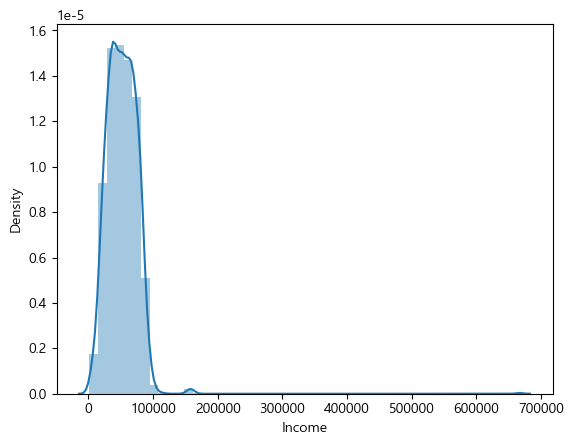

In [56]:
sns.distplot(df['Income']);

가장 중요한 변수에 대해 상세한 탐색을 실시한다. Income(수입)의 분포를 확인한다. 거의 대부분의 데이터가 100000 이하에 분포한다

In [57]:
import numpy as np

val = 'Income'
sp1 = 30000
sp2 = 60000

# ------------------------------------------------------------

df['gp'] = np.where (df[val] <= sp1, 1, 
                           np.where(df[val] <= sp2, 2, 3))

df_gp = df.groupby('gp')['Response'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp.sort_values(by=['ratio'], ascending = False)

,count,sum,ratio
gp,,,
3,841,181,21.5
2,1029,114,11.1
1,370,39,10.5


30000, 60000 사이의 값을 평균으로 측정하고 3개의 구간으로 구간화를 진행한다

수입이 클수록 마케팅 캠페인 반응률이 높은 것을 확인할 수 있다. 가장 중요한 변수임을 알 수 있고, 매우 주의깊게 살펴봐야한다

성과측정은 기본 베이스 코드(위의 전체 코드)를 가지고 익월 데이터를 추가 업로드해서 성과비교가 필요하다. 예를 들어, 위의 데이터로 예측한 반응률을 타겟마케팅 전/후 마케팅 비용 대비 반응률을 비교하는것이다.

ex) 마케팅 캠페인 반응 예측 고객 = gp3의 고객들(수입이 60000 이상인 고객들)